## Industry Project - Chicago Crime 2012 - 2017 EDA & Visualizations
### April 18th, 2024

In [1]:
# Formatting the Notebook width
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [31]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing Dataset as 'df'
df_original = pd.read_csv('Chicago_Crimes_2012_to_2017.csv')
df = df_original.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1456714 non-null  int64  
 1   ID                    1456714 non-null  int64  
 2   Case Number           1456713 non-null  object 
 3   Date                  1456714 non-null  object 
 4   Block                 1456714 non-null  object 
 5   IUCR                  1456714 non-null  object 
 6   Primary Type          1456714 non-null  object 
 7   Description           1456714 non-null  object 
 8   Location Description  1455056 non-null  object 
 9   Arrest                1456714 non-null  bool   
 10  Domestic              1456714 non-null  bool   
 11  Beat                  1456714 non-null  int64  
 12  District              1456713 non-null  float64
 13  Ward                  1456700 non-null  float64
 14  Community Area        1456674 non-

### Data Dictionary
`Unnamed: 0:` Unknown column - *can be dropped* <br>
`ID:` Reference number for row in the dataset - *can be dropped* <br>
`Case Number:` Crime case reference ID <br>
`Date:` Incident date <br>
`Block:` Street Address nomenclature where the incident occured <br>
`Illinois Uniform Crime Reporting:` Crime type code <br>
`Primary Type:` Type of crime committed <br>
`Description:` Description of crime type <br>
`Location Description:` Type of location where the crime occurred <br>
`Arrest:` Boolean value indicating if an arresst was made <br>
`Domestic:` Boolean value indicating if the incident was domestic <br>
`Beat:` Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car - *can be dropped* <br>
`District:` Police district where the incident occurred <br>
`Ward:` City Council district where the incident occurred *can be dropped* <br>
`Community Area:` Indicates the community area where the incident occurred. Chicago has 77 community areas  <br>
`FBI Code:` Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System  <br>
`X Coordinate:` The x coordinate of the location where the incident occurred in State Plane <br>
`Y Coordinate:` The y coordinate of the location where the incident occurred in State Plane <br>
`Year:` Year the incident occurred <br>
`Updated On:` Date and time the record was last updated <br>
`Latitude:` The latitude of the location where the incident occurred <br>
`Longitude:` The longitude of the location where the incident occurred.Date when the facility was inaugurated <br>
`Location:` The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. <br>

In [13]:
# Dropping irrelevant columns
irrelevant_columns = ['Unnamed: 0','ID','Beat','Ward'] 

df = df.drop(columns=irrelevant_columns)

In [14]:
# Sanity Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456714 entries, 0 to 1456713
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Case Number           1456713 non-null  object 
 1   Date                  1456714 non-null  object 
 2   Block                 1456714 non-null  object 
 3   IUCR                  1456714 non-null  object 
 4   Primary Type          1456714 non-null  object 
 5   Description           1456714 non-null  object 
 6   Location Description  1455056 non-null  object 
 7   Arrest                1456714 non-null  bool   
 8   Domestic              1456714 non-null  bool   
 9   District              1456713 non-null  float64
 10  Community Area        1456674 non-null  float64
 11  FBI Code              1456714 non-null  object 
 12  X Coordinate          1419631 non-null  float64
 13  Y Coordinate          1419631 non-null  float64
 14  Year                  1456714 non-

In [15]:
# Checking for Null values
df.isna().sum()

Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1658
Arrest                      0
Domestic                    0
District                    1
Community Area             40
FBI Code                    0
X Coordinate            37083
Y Coordinate            37083
Year                        0
Updated On                  0
Latitude                37083
Longitude               37083
Location                37083
dtype: int64

##### <center> All nulls are found on location/coordinate records, which are highly relevant in our analysis. Thus, all nulls will be dropped as they only account for > 3% of our overall dataset - no major impact.

In [16]:
# Drop Nulls
df = df.dropna()

In [63]:
# Sanity Check
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418379 entries, 0 to 1456713
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Case Number           1418379 non-null  object 
 1   Date                  1418379 non-null  object 
 2   Block                 1418379 non-null  object 
 3   IUCR                  1418379 non-null  object 
 4   Primary Type          1418379 non-null  object 
 5   Description           1418379 non-null  object 
 6   Location Description  1418379 non-null  object 
 7   Arrest                1418379 non-null  bool   
 8   Domestic              1418379 non-null  bool   
 9   District              1418379 non-null  float64
 10  Community Area        1418379 non-null  float64
 11  FBI Code              1418379 non-null  object 
 12  X Coordinate          1418379 non-null  float64
 13  Y Coordinate          1418379 non-null  float64
 14  Year                  1418379 non-

(1418379, 19)

##### <center> We now have an even dataset with no null values

In [22]:
# Checking Value counts
for column in df.columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: Case Number
HZ140230    6
HZ403466    4
HZ554936    4
HW486725    3
HV217424    3
           ..
HW217671    1
HW217765    1
HW217621    1
HW217637    1
HZ250517    1
Name: Case Number, Length: 1418272, dtype: int64


Column: Date
01/01/2012 12:01:00 AM    126
01/01/2015 12:01:00 AM     97
01/01/2015 12:00:00 AM     88
01/01/2012 12:00:00 AM     78
01/01/2013 09:00:00 AM     77
                         ... 
09/22/2013 10:08:00 PM      1
09/22/2013 09:12:00 PM      1
09/22/2013 08:15:00 AM      1
09/22/2013 07:53:00 PM      1
05/03/2016 09:07:00 PM      1
Name: Date, Length: 571110, dtype: int64


Column: Block
001XX N STATE ST        3567
0000X W TERMINAL ST     2671
008XX N MICHIGAN AVE    2430
076XX S CICERO AVE      2090
0000X N STATE ST        1810
                        ... 
032XX W 80TH ST            1
0000X W 93RD ST            1
028XX W 80TH ST            1
053XX N MENARD AVE         1
000XX W 79TH ST            1
Name: Block, Length: 32549, dtype: int64


Column: IUCR


In [64]:
# Create dummy column to plot
dummy_df = pd.get_dummies(df['Primary Type'])

# Concatenate dummy columns with original dataframe
df_with_dummies = pd.concat([df, dummy_df], axis=1)

In [27]:
df_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418379 entries, 0 to 1456713
Data columns (total 52 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   Case Number                        1418379 non-null  object 
 1   Date                               1418379 non-null  object 
 2   Block                              1418379 non-null  object 
 3   IUCR                               1418379 non-null  object 
 4   Primary Type                       1418379 non-null  object 
 5   Description                        1418379 non-null  object 
 6   Location Description               1418379 non-null  object 
 7   Arrest                             1418379 non-null  bool   
 8   Domestic                           1418379 non-null  bool   
 9   District                           1418379 non-null  float64
 10  Community Area                     1418379 non-null  float64
 11  FBI Code                

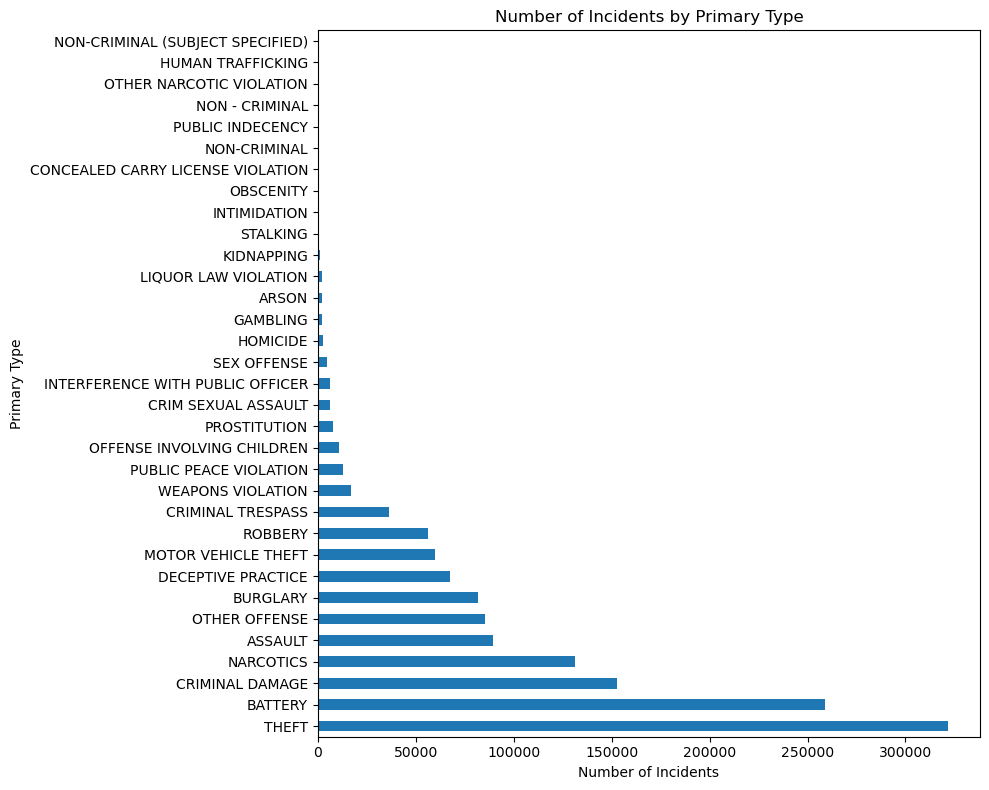

In [65]:
primary_type_counts = df['Primary Type'].value_counts()

# plot horizontal bar chart
plt.figure(figsize=(10, 8))
primary_type_counts.plot(kind='barh')
plt.title('Number of Incidents by Primary Type')
plt.xlabel('Number of Incidents')
plt.ylabel('Primary Type')
plt.tight_layout()
plt.show()

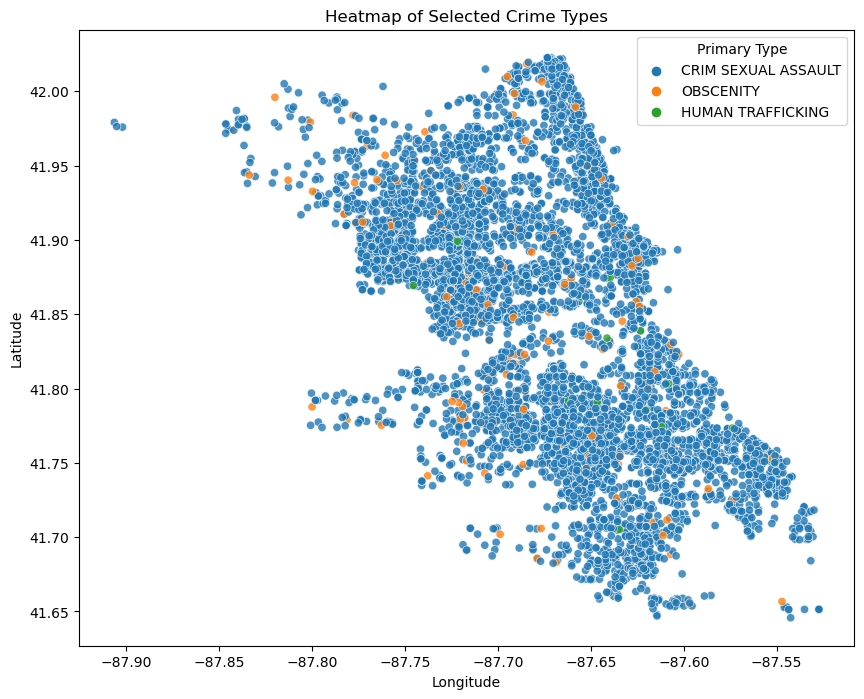

In [66]:
# Filter dataframe to columns of interest
selected_types = ['CRIM SEXUAL ASSAULT', 'HUMAN TRAFFICKING', 'OBSCENITY']
selected_df = df[df['Primary Type'].isin(selected_types)]

# Plot heatmap on coordinate chart
plt.figure(figsize=(10, 8))
sns.scatterplot(data=selected_df, x='Longitude', y='Latitude', hue='Primary Type', alpha=0.8)
plt.title('Heatmap of Selected Crime Types')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Type', loc='upper right')
plt.show()


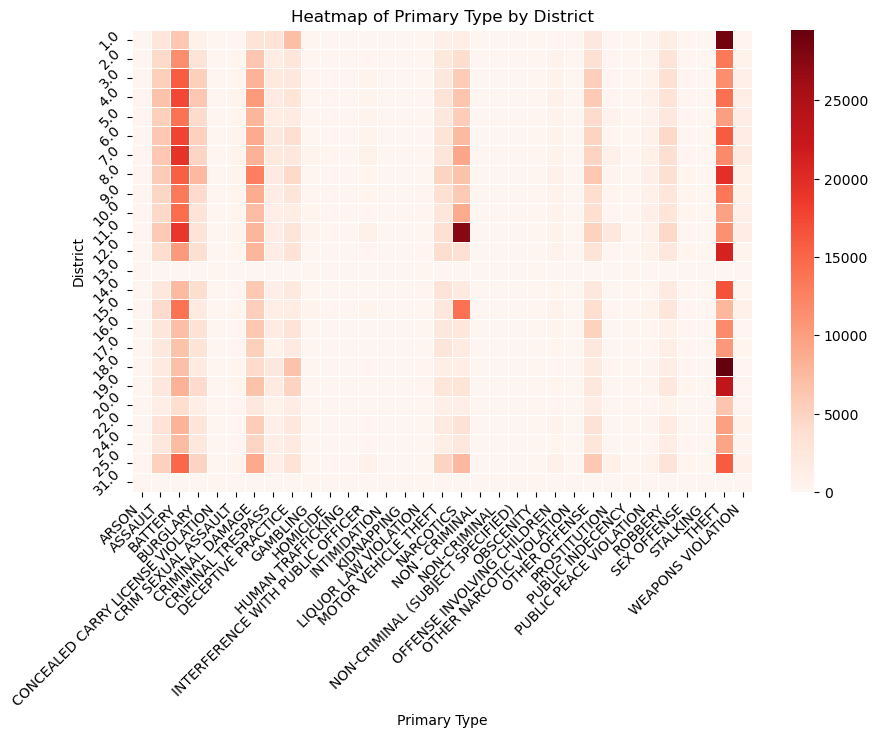

In [69]:
# Group by 'District' and 'Primary Type' & count the occurrences
community_primary_counts = df.groupby(['District', 'Primary Type']).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(community_primary_counts, cmap='Reds', linewidths=0.5)
plt.title('Heatmap of Primary Type by District')
plt.xlabel('Primary Type')
plt.ylabel('District')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

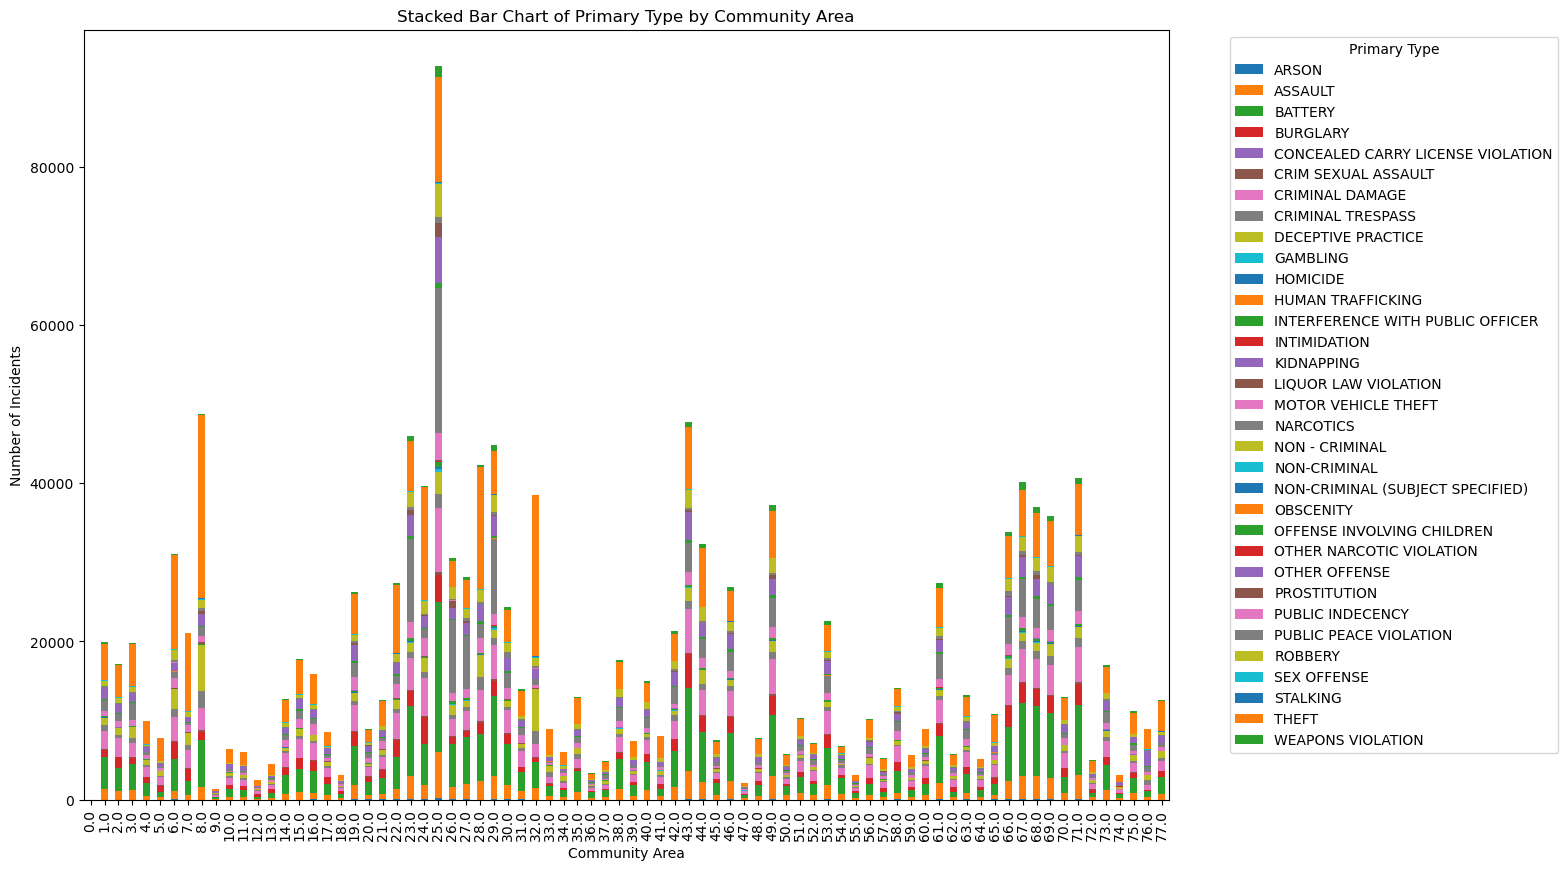

In [70]:
# Group by 'Community Area' and 'Primary Type' & count the occurrences
community_primary_counts = df.groupby(['Community Area', 'Primary Type']).size().unstack(fill_value=0)

# Plot stacked bar chart
community_primary_counts.plot(kind='bar', stacked=True, figsize=(14, 10))
plt.title('Stacked Bar Chart of Primary Type by Community Area')
plt.xlabel('Community Area')
plt.ylabel('Number of Incidents')
#plt.xticks(rotation=45, ha='right')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()